<h3> Examining the Evolution of Black Holes in Romulus </h3>

In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
plt.ion()
sim = db.get_simulation('cosmo25')

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

<h3> Tracking Individual BHs Through Time </h3> 

We can track black holes between simulation snapshots much like we can with galaxies.

In [2]:
#First we select our black hole. Black hole ID numbers are just random numbers without intrinsic meaning so often we will select BHs for a reason.
#One common way is to select them based on them being at the center of a galaxy we care about.

#Select halo 48 from the database.
#In Romulus we only have BH data up to step number 7779 so that is what we will use here

halo48 = db.get_halo('cosmo25/%7779/48')

#Now find the BH you want.
#In this case we will extract the most massive BH within 1 kpc of the center
#(hence we will call it bh_h48cen to tell us what halo and how we selected it)

#Reading the link() function step by step:
#We are extracting BH_central objects [i.e. ignoring any BH in a satellite galaxy]
#Based on their mass (BH_mass) being the maximum ("max") value
#And limiting our search such that the BHs are within 1 kpc of the center (BH_central_distance < 1)
bh_h48cen = halo48.calculate('link(BH_central,BH_mass, "max", BH_central_distance<1)')


#Just like galaxies, black holes can be tracked backwards (or forwards) in time
print("Original BH: ",bh_h48cen)

#find the halo in the previous timestep
print("Previous Step: ", bh_h48cen.previous)
print("Next Previous Step: ", bh_h48cen.previous.previous) #asking for "previous" twice results in moving two steps back

#Notice how the the ID remains the same

print("Original BH ID: ",bh_h48cen.halo_number)
print("Previous Step BH ID: ", bh_h48cen.previous.halo_number)
print("Two Steps Previous BH ID: ", bh_h48cen.previous.previous.halo_number)

#This is because BHs are traced back based on their ID.
#So, while the value of a black hole's ID (or "halo_number") doesn't mean anything on its own,
#unlike halo number it CAN be used to trace back a single black hole because each one
#always has the same ID number. This is an important difference between BHs and galaxies in the database.


Original BH:  <BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007779/BH_1981967682' | NDM=0 Nstar=0 Ngas=0>
Previous Step:  <BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007680/BH_1981967682' | NDM=0 Nstar=0 Ngas=0>
Next Previous Step:  <BH 'cosmo25/cosmo25p.768sg1bwK1BHe75.007552/BH_1981967682' | NDM=0 Nstar=0 Ngas=0>
Original BH ID:  1981967682
Previous Step BH ID:  1981967682
Two Steps Previous BH ID:  1981967682


In [3]:
#Now that we have our black hole, we can extract the properties of its progenitors the same way we do for galaxies
#Here we are extracting the mass ("BH_mass") over time ("t()")

BH_mass_history, time = bh_h48cen.calculate_for_progenitors('BH_mass', 't()')

# this will give us two arrays: the mass of this black hole through time [BH_mass_history]
# and the time at which each value of mass_hist was found in the simulation outputs [time]
# Note the time values go backwards and are presented as time since the big bang
# So, the first value is 13.8 (present day) with decreasing time as you go backward toward the start of the Universe

print('BH mass through time:', BH_mass_history)
print('Time:', time)

BH mass through time: [32334468.45   32095536.45   31669839.27   31302282.21   31225027.53
 30818046.69   30712120.17   30597432.81   29991142.86   29916277.5
 29234126.64   29183353.59   28536644.31   28519719.96   28424943.6
 27768477.93   27532731.69   24785611.02   24505264.14   24020431.29
 23699465.97   23108507.49   22721636.76   21981544.89   21929577.18
 21488946.75   20983008.24   20608482.33   20030864.22   19838245.206
 19110657.444  19049172.276  18595997.916  18346294.065  18317283.738
 17761069.953  17565703.221  17140225.062  16821907.905  16653241.824
 16547315.304  16129881.189  16116301.887  15536055.525  15220446.264
 14976217.938  14405270.013  14344421.997  13847164.683  13467581.379
 13387997.112  13355143.962  12892034.013  12490966.74   12370505.19
 11733054.525   6104931.621   6102502.479   6069231.198   6066065.349
  6019393.965   6002051.484   5820562.719   4081097.937   3482513.544
  3406533.168   3352753.557   2820213.951   1450012.6017  1408987.9773
  139

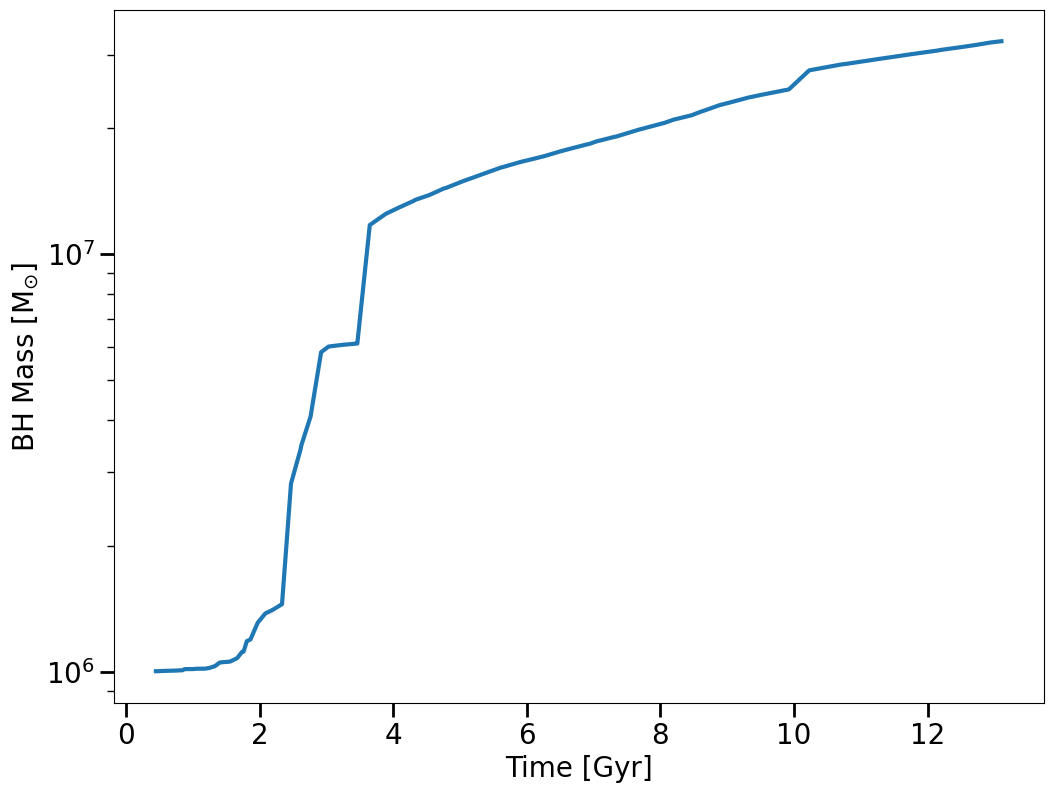

In [4]:
# And now we can plot it up!

plt.plot(time, BH_mass_history, lw=3)
plt.ylabel('BH Mass [M$_{\odot}$]')
plt.xlabel('Time [Gyr]')
plt.yscale('log')

One thing to remember is that we are looking at the evolution of a single black hole object, which has a constant identification number throughout the simulation. However, it is important to remember that in Romulus each galaxy can have multiple black holes. The black hole at the center may not always be the same one. It is therefore often useful to track the evolution of black holes based on the host galaxy, rather than the individual black hole. In this case, you can think about properties like "black hole mass" as being properties of the galaxy (i.e. "at any given time, what is the mass of this galaxies largest, central black hole?")

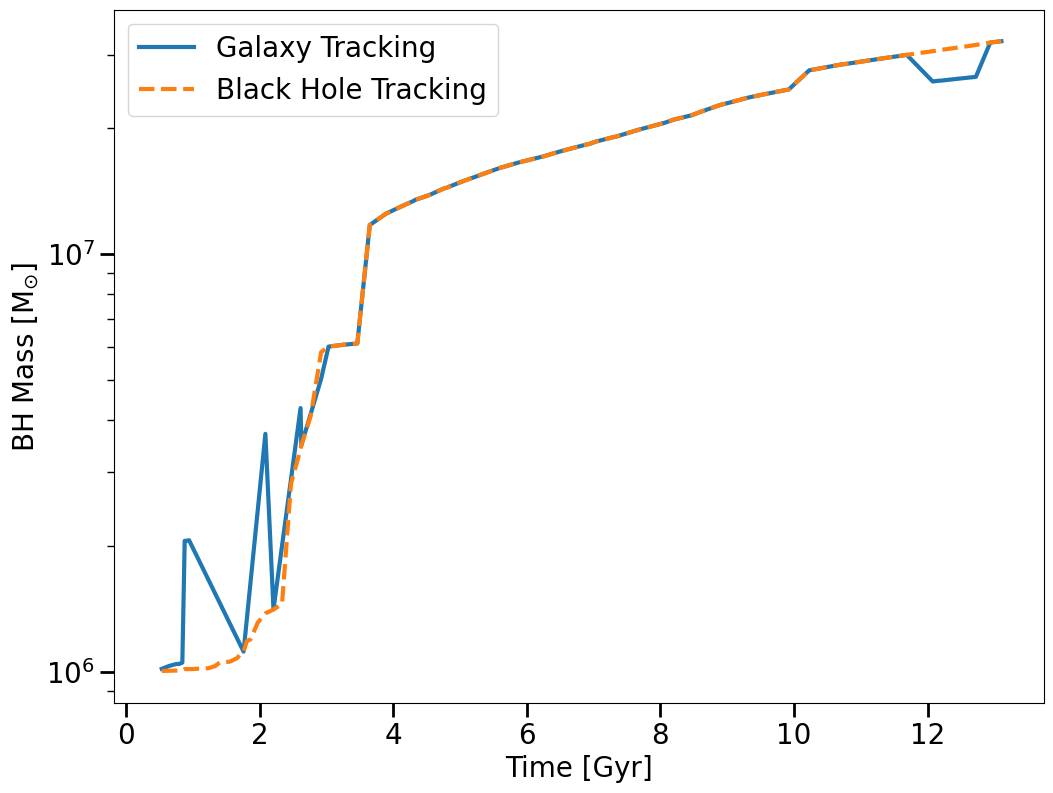

In [5]:
# We already have our galaxy selected above (halo48)
# Just like for typical galaxy properties, we can find linked black holes in previous snapshots and extract their properties
# Here we are finding the mass of the most massive BH within 1 kpc of the galaxy center, as well as the time for each snapshot

BH_mass_history_gal, time_gal = halo48.calculate_for_progenitors('link(BH_central,BH_mass, "max", BH_central_distance<1).BH_mass', 't()')

#Now we will plot both lines: one will represent the growth history of the individual black hole, like the one above  ("Black Hole Tracking")
#The other line will represent what happens if we trace the galaxy through time and plot the mass of its central BH over time ("Galaxy Tracking")

plt.plot(time_gal, BH_mass_history_gal, lw=3, label='Galaxy Tracking') #use "label" so that we can create a legend below
plt.plot(time, BH_mass_history, lw=3, ls='--', label='Black Hole Tracking') #use ls='--' to change the linestype to "dashed"
#Note that there are other line styles you can use (':' == dotted, '-.' = dash-dot)

plt.ylabel('BH Mass [M$_{\odot}$]')
plt.xlabel('Time [Gyr]')
plt.yscale('log')
plt.legend(loc='upper left') #create your legend and tell it to be located in the upper left of the plot
#loc can also be 'upper left', 'upper right', 'lower left', 'lower center', etc

In [6]:
# Note that in the plot above, there are instances where different black holes of different mass are in the center of the galaxy, especially at early times.
# In other words, what is the central BH at the end of the simulation was not always there!
# We can also see this if we examine the ID numbers for the central black holes in halo 48 tracked through time
# We once again calculate BH properties by tracing the galaxy through time, this time extracting the ID number ("halo_number()") for each BH

BH_id_history, time_gal = halo48.calculate_for_progenitors('link(BH_central,BH_mass, "max", BH_central_distance<1).halo_number()', 't()')

print("BH IDs for halo 48 through time: ", BH_id_history)

# Note that while BH #1981967682 is at the center for the majority of time, there are plenty of instances where different black holes end up at the center.
# At the very start of the simulation in the early Universe 1981967682 is not at the center at all! 
# It is only after some time that this particular BH finds its way to the center
# Why does this happen? Well, galaxies often merge and, with them, they bring along their own central BHs
# Those BHs may then make their way to the center. Sometimes they merge with the central BH. Other times they may simply switch places for some amount of time.

BH IDs for halo 48 through time:  [1981967682 1981967682 1982352448 1982352448 1982352448 1982352448
 1982352448 1982352448 1981967682 1981967682 1981967682 1981967682
 1981967682 1981967682 1981967682 1981967682 1981967682 1981967682
 1981967682 1981967682 1981967682 1981967682 1981967682 1981967682
 1981967682 1981967682 1981967682 1981967682 1981967682 1981967682
 1981967682 1981967682 1981967682 1981967682 1981967682 1981967682
 1981967682 1981967682 1981967682 1981967682 1981967682 1981967682
 1981967682 1981967682 1981967682 1981967682 1981967682 1981967682
 1981967682 1981967682 1981967682 1981967682 1981967682 1981967682
 1981967682 1981967682 1981967682 1981967682 1981967682 1981967682
 1981967682 1982229519 1981967682 1982229519 1981967682 1982229519
 1981967682 1982245627 1982245627 1982245627 1982245627 1982245627
 1982245627 1982245627 1982245627 1982245627 1982245627]


<h3> Black Hole Mergers </h3>

When two black holes get close together in the simulation, they merge into a single black hole! One complication with this process is that the new black hole inherits the ID number of one of the two black holes. The other black hole is essentially removed from the simulation. This is in part why tracing individual black holes is not always the right answer. When a merger occurs, it is never certain which BH is the "correct" one to follow (remember, the ID numbers are essentialy meaningless). Do you follow the one that was in the center previously? Or the more massive black hole? It can really depend on what you are trying to do. Here we will explore a little bit about how to examine data related to black hole mergers.

In [7]:
# There is a list of BH mergers saved in what is called a "pickle file"
# To read it you need to import the package called 'pickle' and then open up the file using the open() function
# IMPORTANT: when you open the file don't forget "rb", which tells python that you are reading (r) a binary (b) file!

import pickle
f = open('/home/michael/Research/Data/Romulus/cosmo25/BHmergers_simple.pkl','rb') #open the file
bhmergers = pickle.load(f) #load it in with pickle
f.close() #close the file

#Now your new object, called bhmergers here, is a dictionary of properties for each merger event

print(bhmergers.keys()) #print out all the available property names

dict_keys(['time', 'ID1', 'ID2', 'ratio', 'kick', 'step', 'redshift', 'merge_mass_2', 'merge_mass_1', 'merge_mdot_2', 'merge_mdot_1', 'merge_lum_2', 'merge_lum_1', 'tform1', 'tform2', 'init_dist'])


Text(0, 0.5, 'Number of Mergers')

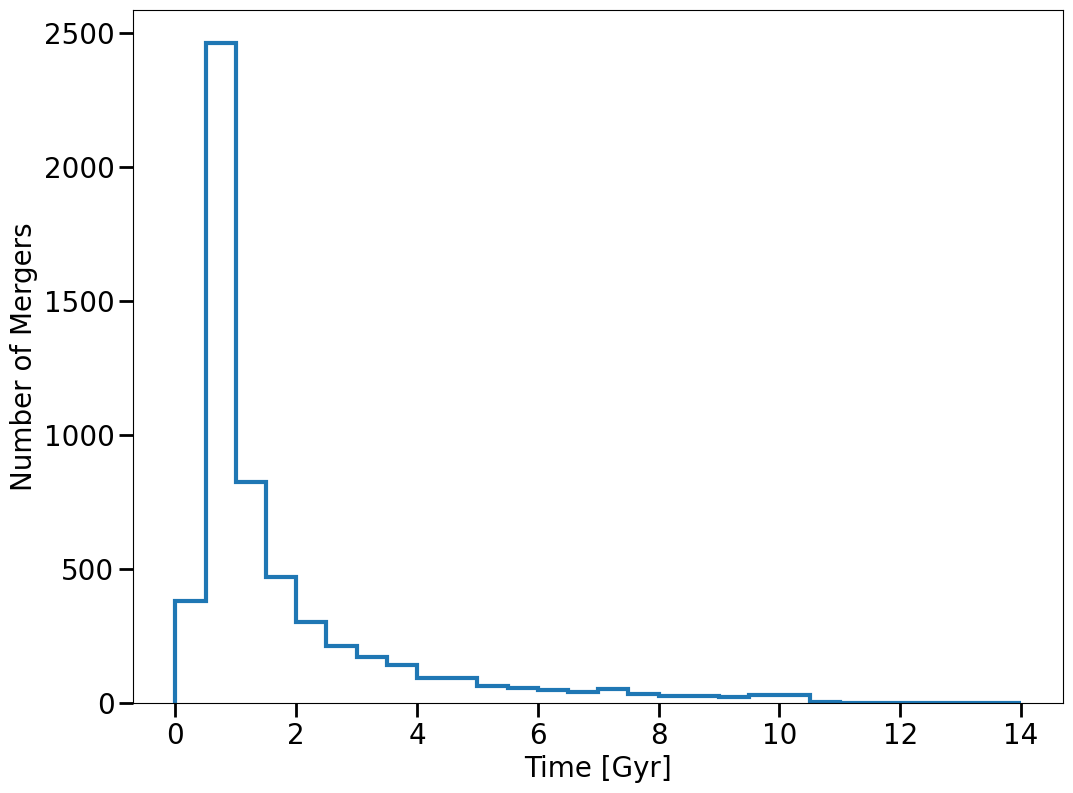

In [8]:
# Each of the dictionary items is an array of merger properties. The first values all correspond to the first merger, second to the second, and so on.
# Think of this like a table and the item names ('time', 'ID1', 'step', etc) are column names and each row (1st row = first values) is a single merger event

# We can use this file to examine general properties of mergers. For example, we might want to look at the distribution in time of merger events in the simulation
# The hist() function in matplotlib is super useful!
# Histograms result from binning data by a certain property (in this case, we will use time) and simply counting how many instances are in each bin
# "Bins" are just ranges of values. We often think of bins based on their "edges"
# Bin edges of time = [0,1,2,3] will result in three bins of time: 0-1, 1-2, and 2-3.

# The important parameters in hist() are range, which tells it the range to create bins over, and bins which gives the number of bins you want to create.
# By default, histogram will generate bins of equal length over your range (in the below example, this will create 28 bins of size 0.5 Gyr)
# The histtype='step' parameter is typically good to use because it will create a line plot rather than a bar graph which is often harder to read

plt.hist(bhmergers['time'], range=[0,14], bins=28, lw=3, histtype='step') #note that parameters like lw are also used in plot()!
plt.xlabel('Time [Gyr]')
plt.ylabel('Number of Mergers')

Text(0, 0.5, 'Probability Density')

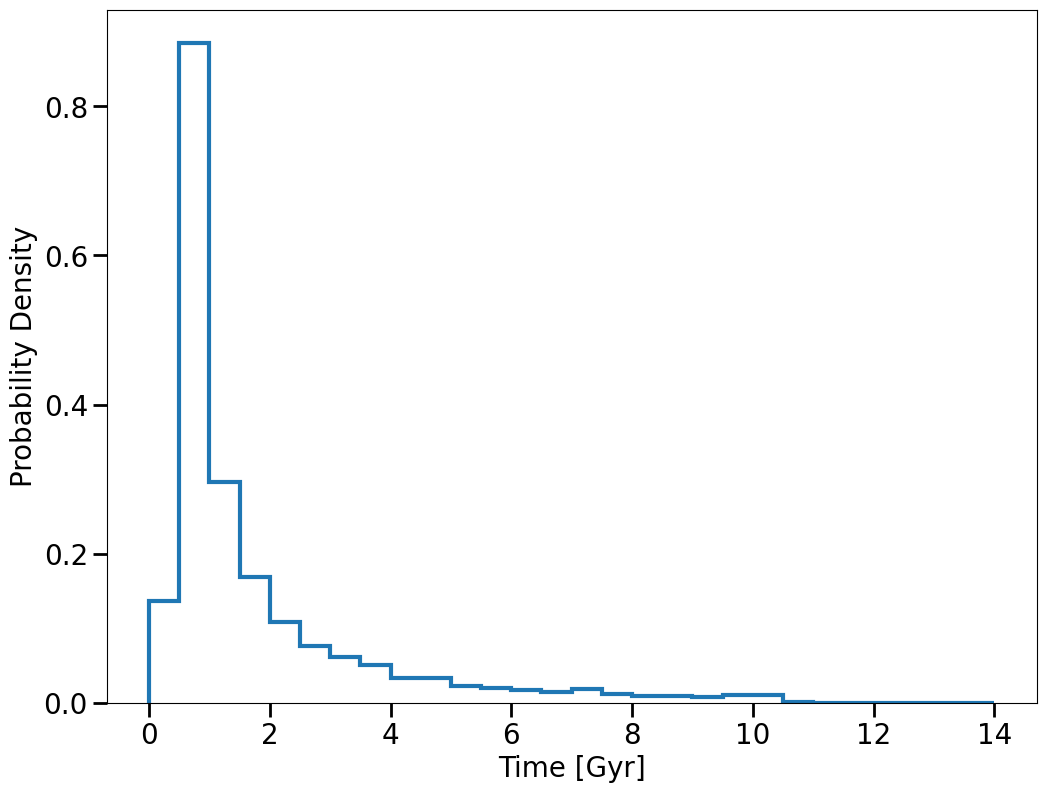

In [10]:
# Often, the raw number is not what we are interested in. Instead, histograms can give more generalized information
# When you normalize the raw numbers by the total number of mergers, you get a fraction.
# This is useful because the total number of mergers is really a result of the size of the simulation.
# Presenting results as a fraction makes it clear that we are mostly interested in the RELATIVE difference in each bin
# (e.g. "25% of the mergers take place before this time")

# Further, we can normalize by the size of our bins as well.
# So, doing both: N_bin / (binsize * N_total) = "Probability Density"
# plt.hist() can do this by setting density=True

plt.hist(bhmergers['time'], range=[0,14], bins=28, lw=3, histtype='step', density=True) 
plt.xlabel('Time [Gyr]')
plt.ylabel('Probability Density')

# Note that the SHAPE of the plot remains unchanged but the values on the Y axis (as well as the definition of the Y axis) has changed.

In [11]:
# Beyond looking at the overall population of merger events, we may care about an individual black hole's merger history
# Notice in the mass evolution plot above there are several instances of sharp jumps in mass
# This is not due to accretion but rather merger events!  A new black hole is coming in and instantaneously increasing the mass of our target black hole

# To find the mergers associated with a particular black hole, we can slide our array of values based on the ID number
# In the mergers file "ID1" corresponds to the "surviving" black hole ID while "ID2" is the black hole that is "eaten" or removed from the simulation after the merger
# In other words, black holes ID1 and ID2 merge and the resulting black hole has ID = ID1.

# Here we can list the times of all mergers involving BH ID 1981967682 (our chosen BH above)
print(bhmergers['time'][(bhmergers['ID1']==1981967682)])

# Alternatively, you can find the indices that correspond to mergers we care about 
our_mergers = np.where(bhmergers['ID1']==1981967682)[0]

# Then this can be used on any other merger property
print(bhmergers['time'][our_mergers])
print(bhmergers['redshift'][our_mergers])

[ 3.647082 10.175588  2.388457  2.91667 ]
[ 3.647082 10.175588  2.388457  2.91667 ]
[1.79390628 0.31068576 2.72812273 2.25564271]


<h3> Black Hole Histogram Properties </h3>

Like galaxies, black holes also have properties with higher time resolution than just snapshots. Recall that galaxies have a property `SFR_histogram` that does this. For black holes, we can examine their growth rate over time (how much mass they are accumulating by "eating" nearby gas). This property is stored in `BH_mdot_histogram` and can be accessed in much the same way as `SFR_histogram`.

In [12]:
# We will extract this in a similar way as we did for galaxy SFR_histograms

bhmdot = bh_h48cen['BH_mdot_histogram']

# This property is a histogram, meaning that it bins the stars formed in the simulation into bins of formation times
# The property that you get out is the accretion rate at various times
# To check the time between subsequent mdot values, we use the same simulation property as for SFR
dt = sim["histogram_delta_t_Gyr"]

# Now create your time array
time_mdot = np.arange(len(bhmdot)) * dt + dt/2.

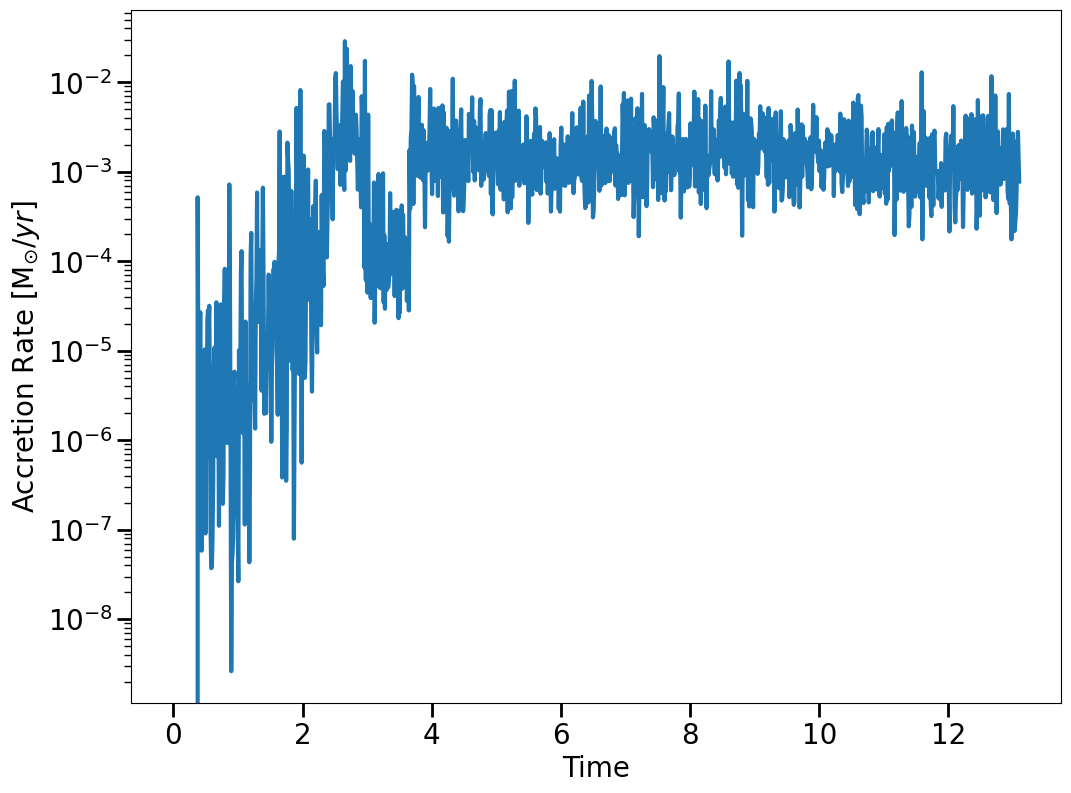

In [14]:
# Now we plot it!
# Note that "dot" is used in math to denote a time derivative which is why we have used it in the variable name

plt.plot(time_mdot, bhmdot, lw=3)
plt.ylabel('Accretion Rate [M$_{\odot}/yr$]')
plt.xlabel('Time')
plt.yscale('log')

# Think about what might be causing that dip between 3 and 4 Gyrs... Look back at the previous plots for clues

While the above plots the growth history of a single black hole, we have already discussed how each black hole at the end of the simulation (more specifically, step 7779 in our case which is essentially the end) has had a history of merger events. Some of those previous black holes may have grown themselves and contributed to the final mass of our central BH. To account for this, we can actually calculate the accretion rate for a black hole summed over all the black holes in its merger history. This represents a more complete picture of the total black hole growth history experienced by the black hole through time.

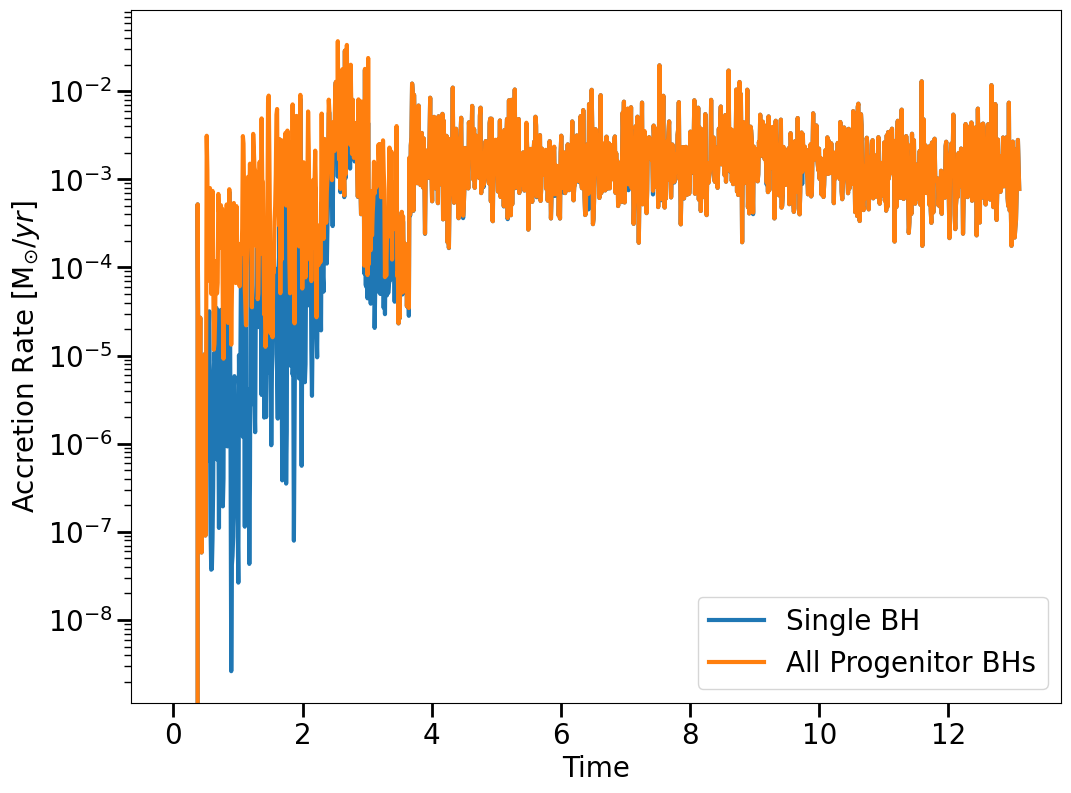

In [15]:
# To do this, we will need to use the reassemble() function.
# this function takes as an argument the histogram property we care about, in this case BH_mdot_histogram.
# By defulat, it will give us the exact same answer as just asking for the property like we do above
bhmdot_single = bh_h48cen.calculate("reassemble(BH_mdot_histogram)")

# But the reason we need to use it is for its other functionality.
# If we put in the argument "sum" we can perform this summation of the accretion histories

bhmdot_all = bh_h48cen.calculate("reassemble(BH_mdot_histogram,'sum')")

plt.plot(time_mdot, bhmdot_single, lw=3, label='Single BH')
plt.plot(time_mdot, bhmdot_all, lw=3, label='All Progenitor BHs')
plt.legend(loc='lower right')
plt.ylabel('Accretion Rate [M$_{\odot}/yr$]')
plt.xlabel('Time')
plt.yscale('log')




<h3> Coding Challenge </h3>

For a given black hole, we can pretty easily find all the mergers that take place with that specific black hole (see above). However, consider this: if each black hole experiences its own merger events, then every black hole that merges with our target object may have its own history of mergers. When determining the TOTAL number of mergers that each black hole experiences, we need to count not only the mergers that involved that black hole, but all of the mergers those black holes went through and so on.

Goal: For a given black hole (e.g. BH 1981967682) find the total number of mergers in its merger tree. For each BH that mergers with this particular one, find all of its mergers and so on.

Hint: you will need to use a for loop and find a way to continuously add new BHs to a list as you make your way through the "levels" of the merger tree